
1. Importing Packages# House Prices: Context

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## 1. Importing Packages 

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)  

## 2. Loading and Inspecting Data

In [2]:
training = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
testing = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
training.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
training.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
training.shape

(1460, 81)

In [6]:
training.keys()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
correlations = training.corr()
correlations = correlations["SalePrice"].sort_values(ascending=False)
features = correlations.index[1:6]
correlations

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

## 3. Imputing Null Values 

In [8]:
training_null = pd.isnull(training).sum()
testing_null = pd.isnull(testing).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])

In [9]:
null_many = null[null.sum(axis=1) > 200]  #a lot of missing values
null_few = null[(null.sum(axis=1) > 0) & (null.sum(axis=1) < 200)]  #not as much missing values

In [10]:
null_many

,Training,Testing
LotFrontage,259,227.0
Alley,1369,1352.0
FireplaceQu,690,730.0
PoolQC,1453,1456.0
Fence,1179,1169.0
MiscFeature,1406,1408.0


In [11]:
#you can find these features on the description data file provided

null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [12]:
for i in null_has_meaning:
    training[i].fillna("None", inplace=True)
    testing[i].fillna("None", inplace=True)

## Imputing "Real" NaN Values

In [13]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer

#imputer = Imputer(strategy="median")
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [14]:
training_null = pd.isnull(training).sum()
testing_null = pd.isnull(testing).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])

In [15]:
null_many = null[null.sum(axis=1) > 200]  #a lot of missing values
null_few = null[(null.sum(axis=1) > 0) & (null.sum(axis=1) < 200)]  #few missing values

In [16]:
null_many

,Training,Testing
LotFrontage,259,227.0


In [17]:
training.drop("LotFrontage", axis=1, inplace=True)
testing.drop("LotFrontage", axis=1, inplace=True)

In [18]:
null_few

,Training,Testing
MSZoning,0,4.0
Utilities,0,2.0
Exterior1st,0,1.0
Exterior2nd,0,1.0
MasVnrType,8,16.0
MasVnrArea,8,15.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0
BsmtUnfSF,0,1.0
TotalBsmtSF,0,1.0


In [19]:
training["GarageYrBlt"].fillna(training["GarageYrBlt"].median(), inplace=True)
testing["GarageYrBlt"].fillna(testing["GarageYrBlt"].median(), inplace=True)
training["MasVnrArea"].fillna(training["MasVnrArea"].median(), inplace=True)
testing["MasVnrArea"].fillna(testing["MasVnrArea"].median(), inplace=True)
training["MasVnrType"].fillna("None", inplace=True)
testing["MasVnrType"].fillna("None", inplace=True)

In [20]:
types_train = training.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == int) | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

#we do the same for the test set
types_test = testing.dtypes
num_test = types_test[(types_test == int) | (types_test == float)]
cat_test = types_test[types_test == object]

Numerical Imputing 

In [21]:
#we should convert num_train and num_test to a list to make it easier to work with
numerical_values_train = list(num_train.index)
numerical_values_test = list(num_test.index)

In [22]:
print(numerical_values_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [23]:
fill_num = []

for i in numerical_values_train:
    if i in list(null_few.index):
        fill_num.append(i)

In [24]:
print(fill_num)

['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [25]:
for i in fill_num:
    training[i].fillna(training[i].median(), inplace=True)
    testing[i].fillna(testing[i].median(), inplace=True)

Categorical Imputing 

In [26]:
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)

In [27]:
print(categorical_values_train) 

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [28]:
fill_cat = []

for i in categorical_values_train:
    if i in list(null_few.index):
        fill_cat.append(i)

In [29]:
print(fill_cat) 

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']


In [30]:
def most_common_term(lst):
    lst = list(lst)
    return max(set(lst), key=lst.count)
#most_common_term finds the most common term in a series

most_common = ["Electrical", "Exterior1st", "Exterior2nd", "Functional", "KitchenQual", "MSZoning", "SaleType", "Utilities", "MasVnrType"]

counter = 0
for i in fill_cat:
    most_common[counter] = most_common_term(training[i])
    counter += 1

In [31]:
most_common_dictionary = {fill_cat[0]: [most_common[0]], fill_cat[1]: [most_common[1]], fill_cat[2]: [most_common[2]], fill_cat[3]: [most_common[3]],
                          fill_cat[4]: [most_common[4]], fill_cat[5]: [most_common[5]], fill_cat[6]: [most_common[6]], fill_cat[7]: [most_common[7]],
                          fill_cat[8]: [most_common[8]]}
most_common_dictionary

{'MSZoning': ['RL'],
 'Utilities': ['AllPub'],
 'Exterior1st': ['VinylSd'],
 'Exterior2nd': ['VinylSd'],
 'MasVnrType': ['None'],
 'Electrical': ['SBrkr'],
 'KitchenQual': ['TA'],
 'Functional': ['Typ'],
 'SaleType': ['WD']}

In [32]:
counter = 0
for i in fill_cat:  
    training[i].fillna(most_common[counter], inplace=True)
    testing[i].fillna(most_common[counter], inplace=True)
    counter += 1

In [33]:
training_null = pd.isnull(training).sum()
testing_null = pd.isnull(testing).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null[null.sum(axis=1) > 0]

,Training,Testing


## 4. Feature Engineering

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

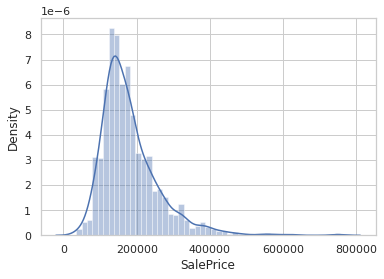

In [34]:
sns.distplot(training["SalePrice"])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

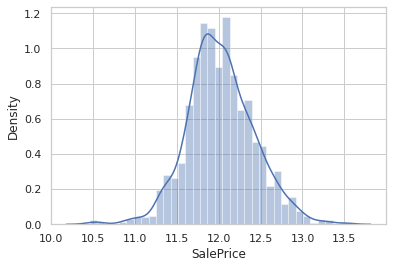

In [35]:
sns.distplot(np.log(training["SalePrice"]))

In [36]:
training["TransformedPrice"] = np.log(training["SalePrice"])

In [37]:
categorical_values_train = list(cat_train.index)
categorical_values_test = list(cat_test.index)

In [38]:
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [39]:
for i in categorical_values_train:
    feature_set = set(training[i])
    for j in feature_set:
        feature_list = list(feature_set)
        training.loc[training[i] == j, i] = feature_list.index(j)

for i in categorical_values_test:
    feature_set2 = set(testing[i])
    for j in feature_set2:
        feature_list2 = list(feature_set2)
        testing.loc[testing[i] == j, i] = feature_list2.index(j)

In [40]:
training.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,0,8450,1,2,0,2,1,1,...,1,3,4,0,2,2008,8,3,208500,12.247694
1,2,20,0,9600,1,2,0,2,1,4,...,1,3,4,0,5,2007,8,3,181500,12.109011
2,3,60,0,11250,1,2,2,2,1,1,...,1,3,4,0,9,2008,8,3,223500,12.317167
3,4,70,0,9550,1,2,2,2,1,3,...,1,3,4,0,2,2006,8,4,140000,11.849398
4,5,60,0,14260,1,2,2,2,1,4,...,1,3,4,0,12,2008,8,3,250000,12.429216


In [41]:
testing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,11622,1,2,0,2,0,1,...,120,0,1,2,2,0,6,2010,8,3
1,1462,20,0,14267,1,2,2,2,0,3,...,0,0,1,3,1,12500,6,2010,8,3
2,1463,60,0,13830,1,2,2,2,0,1,...,0,0,1,2,2,0,3,2010,8,3
3,1464,60,0,9978,1,2,2,2,0,1,...,0,0,1,3,2,0,6,2010,8,3
4,1465,120,0,5005,1,2,2,1,0,1,...,144,0,1,3,2,0,1,2010,8,3


## 5. Creating, Training, Evaluating, Validating, and Testing ML Models 

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import cross_val_score, KFold
from sklearn.model_selection import KFold, cross_val_score 

In [43]:
X_train = training.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y_train = training["TransformedPrice"].values
X_test = testing.drop("Id", axis=1).values

In [44]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [45]:
linreg = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(linreg, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_training, y_training)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best LinReg Model: LinearRegression()
Best Score: 0.8819404767486085


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.2s finished


In [46]:
linreg = grid_linreg.best_estimator_
linreg.fit(X_training, y_training)
lin_pred = linreg.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: 0.702816230811568
RMSE Score: 0.21211689151544505


In [47]:
scores_lin = cross_val_score(linreg, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.8865581486279929


In [48]:
lasso = Lasso()
parameters_lasso = {"fit_intercept" : [True, False], "normalize" : [True, False], "precompute" : [True, False], "copy_X" : [True, False]}
grid_lasso = GridSearchCV(lasso, parameters_lasso, verbose=1, scoring="r2")
grid_lasso.fit(X_training, y_training)

print("Best Lasso Model: " + str(grid_lasso.best_estimator_))
print("Best Score: " + str(grid_lasso.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Lasso Model: Lasso(precompute=True)
Best Score: 0.8030638481359469


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.5s finished


In [49]:
lasso = grid_lasso.best_estimator_
lasso.fit(X_training, y_training)
lasso_pred = lasso.predict(X_valid)
r2_lasso = r2_score(y_valid, lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_valid, lasso_pred))
print("R^2 Score: " + str(r2_lasso))
print("RMSE Score: " + str(rmse_lasso))

R^2 Score: 0.5346055500620817
RMSE Score: 0.26544424298741465


In [50]:
scores_lasso = cross_val_score(lasso, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lasso)))

Cross Validation Score: 0.8024153680708739


In [51]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Ridge Model: Ridge()
Best Score: 0.8825692295536177


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.2s finished


In [52]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.7062826726641578
RMSE Score: 0.21087616488779956


In [53]:
scores_ridge = cross_val_score(ridge, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_ridge)))

Cross Validation Score: 0.8869808357770912


In [54]:
dtr = DecisionTreeRegressor()
parameters_dtr = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], 
                  "max_features" : ["auto", "log2"]}
grid_dtr = GridSearchCV(dtr, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_training, y_training)

print("Best DecisionTreeRegressor Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best DecisionTreeRegressor Model: DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',
                      min_samples_split=10, splitter='random')
Best Score: 0.7386780119561116


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   11.3s finished


In [55]:
dtr = grid_dtr.best_estimator_
dtr.fit(X_training, y_training)
dtr_pred = dtr.predict(X_valid)
r2_dtr = r2_score(y_valid, dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

R^2 Score: 0.7212275782479198
RMSE Score: 0.20544123387335272


In [56]:
scores_dtr = cross_val_score(dtr, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_dtr)))

Cross Validation Score: 0.7480757868140661


In [57]:
rf = RandomForestRegressor()
paremeters_rf = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], 
                 "max_features" : ["auto", "log2"]}
grid_rf = GridSearchCV(rf, paremeters_rf, verbose=1, scoring="r2")
grid_rf.fit(X_training, y_training)

print("Best RandomForestRegressor Model: " + str(grid_rf.best_estimator_))
print("Best Score: " + str(grid_rf.best_score_))

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best RandomForestRegressor Model: RandomForestRegressor(max_features='log2', min_samples_split=3, n_estimators=20)
Best Score: 0.8688296869598695


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  2.7min finished


In [58]:
rf = grid_rf.best_estimator_
rf.fit(X_training, y_training)
rf_pred = rf.predict(X_valid)
r2_rf = r2_score(y_valid, rf_pred)
rmse_rf = np.sqrt(mean_squared_error(y_valid, rf_pred))
print("R^2 Score: " + str(r2_rf))
print("RMSE Score: " + str(rmse_rf))

R^2 Score: 0.8607559081951233
RMSE Score: 0.14519481217591662


In [59]:
scores_rf = cross_val_score(rf, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_rf)))

Cross Validation Score: 0.866560976800959


## Evaluation Our Models 

In [60]:
model_performances = pd.DataFrame({
    "Model" : ["Linear Regression", "Ridge", "Lasso", "Decision Tree Regressor", "Random Forest Regressor"],
    "Best Score" : [grid_linreg.best_score_,  grid_ridge.best_score_, grid_lasso.best_score_, grid_dtr.best_score_, grid_rf.best_score_],
    "R Squared" : [str(r2_lin)[0:5], str(r2_ridge)[0:5], str(r2_lasso)[0:5], str(r2_dtr)[0:5], str(r2_rf)[0:5]],
    "RMSE" : [str(rmse_lin)[0:8], str(rmse_ridge)[0:8], str(rmse_lasso)[0:8], str(rmse_dtr)[0:8], str(rmse_rf)[0:8]]
})
model_performances.round(4)

print("Sorted by Best Score:")
model_performances.sort_values(by="Best Score", ascending=False)

Sorted by Best Score:


,Model,Best Score,R Squared,RMSE
1,Ridge,0.882569,0.706,0.210876
0,Linear Regression,0.881940,0.702,0.212116
4,Random Forest Regressor,0.868830,0.860,0.145194
2,Lasso,0.803064,0.534,0.265444
3,Decision Tree Regressor,0.738678,0.721,0.205441


In [61]:
print("Sorted by R Squared:")
model_performances.sort_values(by="R Squared", ascending=False)

Sorted by R Squared:


,Model,Best Score,R Squared,RMSE
4,Random Forest Regressor,0.868830,0.860,0.145194
3,Decision Tree Regressor,0.738678,0.721,0.205441
1,Ridge,0.882569,0.706,0.210876
0,Linear Regression,0.881940,0.702,0.212116
2,Lasso,0.803064,0.534,0.265444


In [62]:
print("Sorted by RMSE:")
model_performances.sort_values(by="RMSE", ascending=True)

Sorted by RMSE:


,Model,Best Score,R Squared,RMSE
4,Random Forest Regressor,0.868830,0.860,0.145194
3,Decision Tree Regressor,0.738678,0.721,0.205441
1,Ridge,0.882569,0.706,0.210876
0,Linear Regression,0.881940,0.702,0.212116
2,Lasso,0.803064,0.534,0.265444


In [63]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', min_samples_split=3, n_estimators=20)

## 6. Submission 

In [64]:
submission_predictions = np.exp(rf.predict(X_test))

In [65]:
submission = pd.DataFrame({
        "Id": testing["Id"],
        "SalePrice": submission_predictions
    })

submission.to_csv("prices.csv", index=False)
print(submission.shape)

(1459, 2)
